<a href="https://colab.research.google.com/github/mahmudresin/Senior-Design-Project-499/blob/main/Mars_Data_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mars-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5788576%2F9509951%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241003%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241003T143403Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3326af7471bebae25eaa95a4366b1f48c1a0a5059cace8527ecca82788e3e870d0aba600507be1248208e0a615e0a16a5a2781bcb015d6f2a48315564635db63c7452dc599427b4233c0d83b2ed6ff348be119a00c773fed8595f28b01b5ea323d37a9ac8b8aa09fb95d2fb17c849261a802e040f0715e652f81b8abe09b59ec1c4208720155bd9e901c591582b69cfc9ec4fffe358a027d6bd8b684e16e819a33771f16115ceac3ebcd6201a538a386fd6c6f30c8b0112f5e4ac247e553128c7c5b7de990819d067e91feb242ce71b123047b7b284401cd6dd75e05d73b44e8eee84e6615bcfc520a2157ba5f4e22eeaac275aeffb289e523bf2e44e06b54d1'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 6145835638 bytes downloaded
Downloaded and uncompressed: mars-dataset
Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_401848341EDR_F0042778NCAM00409M1.JPG
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_517253710EDR_F0541550NCAM00386M1.JPG
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_434163763EDR_F0180422NCAM00294M1.JPG
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_402116930EDR_F0043200NCAM00440M1.JPG
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_493019158EDR_F0490814NCAM00467M1.JPG
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_507930791EDR_F0521370NCAM00281M1.JPG
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_517524387EDR_F0541778NCAM07753M1.JPG
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_558082318EDR_F0653200NCAM00207M1.JPG
/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr/

In [8]:
!pip install python-utils
!pip install wandb

# Import all the modules we will need
from fastai.imports import *
from fastai.vision.all import *

import python_utils # Import the python-utils package

import PIL

# ! We need this to get some of the training output to work. This will be fixed
# in a future release of Jupyter for VS Code.
# https://github.com/microsoft/vscode-jupyter/pull/13442#issuecomment-1541584881
from IPython.display import clear_output, DisplayHandle


def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)


os.environ["ENABLE_WANDB"] = "ON"

if os.getenv("ENABLE_WANDB"):
    g_ENABLE_WANDB = True
    os.environ["WANDB_NOTEBOOK_NAME"] = "ai4mars.ipynb"
    import wandb
    from fastai.callback.wandb import *

    wandb.login()
    wandb.init(project="AI4Mars")
else:
    g_ENABLE_WANDB = False

DisplayHandle.update = update_patch

g_DEVICE = enable_gpu_if_available()
cleanup_gpu_cache()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00


wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find ai4mars.ipynb.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: yeaminmahmudres (yeaminmahmudres-north-south-university). Use `wandb login --relogin` to force relogin


NameError: name 'enable_gpu_if_available' is not defined

In [11]:
# Import all the modules we will need
from fastai.imports import *
from fastai.vision.all import *  # Import all functions needed from FastAI
import python_utils  # Import the python-utils package
import PIL  # Python Imaging Library for image processing
from IPython.display import clear_output, DisplayHandle
import os

# Function to clear output in VS Code's Jupyter
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)

# Set the WANDB (Weights & Biases) environment variable
os.environ["ENABLE_WANDB"] = "ON"

# Enable Weights & Biases if the environment variable is set
if os.getenv("ENABLE_WANDB"):
    g_ENABLE_WANDB = True
    os.environ["WANDB_NOTEBOOK_NAME"] = "ai4mars.ipynb"
    import wandb
    from fastai.callback.wandb import *

    wandb.login()  # Log in to Weights & Biases
    wandb.init(project="AI4Mars")  # Initialize a new project in Weights & Biases
else:
    g_ENABLE_WANDB = False

# Update the display handle
DisplayHandle.update = update_patch

# Check if a GPU is available and use it; otherwise, use the CPU
g_DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {g_DEVICE}")

# Optional: cleanup GPU cache (if needed)
def cleanup_gpu_cache():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print("GPU cache cleared.")

cleanup_gpu_cache()


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Using device: cpu


In [20]:
import os
from PIL import Image

def preprocess_images(input_dir, output_dir, size=(256, 256)):
  """
  Resizes and saves images from the input directory to the output directory.

  Args:
      input_dir: Path to the directory containing images.
      output_dir: Path to the directory where preprocessed images will be saved.
      size: Desired output size for the images (width, height).
  """
  os.makedirs(output_dir, exist_ok=True)
  for filename in os.listdir(input_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
      filepath = os.path.join(input_dir, filename)
      try:
        with Image.open(filepath) as img:
          img = img.resize(size)
          output_filepath = os.path.join(output_dir, filename)
          img.save(output_filepath)
      except Exception as e:
        print(f"Failed to preprocess image {filename}: {e}")

# Example usage:
input_directory = '/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr'
output_directory = '/kaggle/working/preprocessed_images'
preprocess_images(input_directory, output_directory)

In [25]:
from pathlib import Path

# Define the base dataset path
dataset_path = Path('/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1')

# Define the paths for images and masks
IMAGES_PATH = Path(dataset_path / "msl" / "images" / "edr")
MASK_PATH_TRAIN = Path(dataset_path / "msl" / "labels" / "train")
MASK_PATH_TEST = Path(dataset_path / "msl" / "labels" / "test" / "masked-gold-min3-100agree")

# Check if the paths exist and print the number of files in each directory
if IMAGES_PATH.exists():
    print(f"The path '{IMAGES_PATH}' exists and contains {len(IMAGES_PATH.ls())} files.")
else:
    print(f"The path '{IMAGES_PATH}' does not exist.")

if MASK_PATH_TRAIN.exists():
    print(f"The path '{MASK_PATH_TRAIN}' exists and contains {len(MASK_PATH_TRAIN.ls())} files.")
else:
    print(f"The path '{MASK_PATH_TRAIN}' does not exist.")

if MASK_PATH_TEST.exists():
    print(f"The path '{MASK_PATH_TEST}' exists and contains {len(MASK_PATH_TEST.ls())} files.")
else:
    print(f"The path '{MASK_PATH_TEST}' does not exist.")

The path '/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/images/edr' exists and contains 18130 files.
The path '/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/labels/train' exists and contains 16064 files.
The path '/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min3-100agree' exists and contains 322 files.


In [26]:
from pathlib import Path

def prepare_dataset(images_path, mask_path_train, mask_path_test):
  """
  Splits a dataset into training, testing, and unused portions.

  Args:
    images_path: Path to the directory containing images.
    mask_path_train: Path to the directory containing training masks.
    mask_path_test: Path to the directory containing test masks.

  Returns:
    A tuple containing paths for training images, test images, and unused images.
  """
  train_images = [img.stem for img in mask_path_train.ls()]
  test_images = [img.stem for img in mask_path_test.ls()]
  all_images = [img.stem for img in images_path.ls()]

  unused_images = set(all_images) - set(train_images) - set(test_images)

  return (
      [images_path/f'{name}.JPG' for name in train_images],
      [images_path/f'{name}.JPG' for name in test_images],
      [images_path/f'{name}.JPG' for name in unused_images]
  )

# Define the base dataset path
dataset_path = Path('/kaggle/input/mars-dataset/ai4mars-dataset-merged-0.1')

# Define the paths for images and masks
IMAGES_PATH = Path(dataset_path / "msl" / "images" / "edr")
MASK_PATH_TRAIN = Path(dataset_path / "msl" / "labels" / "train")
MASK_PATH_TEST = Path(dataset_path / "msl" / "labels" / "test" / "masked-gold-min3-100agree")

# Split the dataset
IMAGES_PATH_TRAIN, IMAGES_PATH_TEST, IMAGES_PATH_UNUSED = prepare_dataset(
    IMAGES_PATH, MASK_PATH_TRAIN, MASK_PATH_TEST
)

# Print the number of images in each set
print(f"Training images: {len(IMAGES_PATH_TRAIN)}")
print(f"Test images: {len(IMAGES_PATH_TEST)}")
print(f"Unused images: {len(IMAGES_PATH_UNUSED)}")

Training images: 16064
Test images: 322
Unused images: 2066


In [27]:
assert len(IMAGES_PATH_TRAIN) == len(MASK_PATH_TRAIN.ls())

<Axes: >

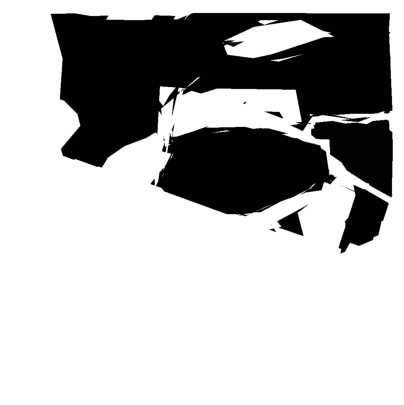

In [31]:
from pathlib import Path
from PIL import Image

# Assuming PILImage is a custom class or function,
# make sure it's properly defined and accessible in your environment
img = Image.open(IMAGES_PATH_TRAIN[2]) # Use Image.open to open an image file

# If you intended to use the ls function on MASK_PATH_TRAIN,
# use the following line instead:
img = PILImage.create(MASK_PATH_TRAIN.ls()[2])

img.show() # Removed figsize argument

In [32]:
from pathlib import Path
from PIL import Image

# Assuming PILImage is a custom class or function,
# make sure it's properly defined and accessible in your environment

get_mask_path = lambda file: MASK_PATH_TRAIN / f"{file.stem}.png"

img = Image.open(get_mask_path(IMAGES_PATH_TRAIN[2])) # Use Image.open to open an image file

# If you intended to use the ls function on MASK_PATH_TRAIN,
# use the following line instead:
# img = PILImage.create(MASK_PATH_TRAIN.ls()[2])

img.show()


<Axes: >

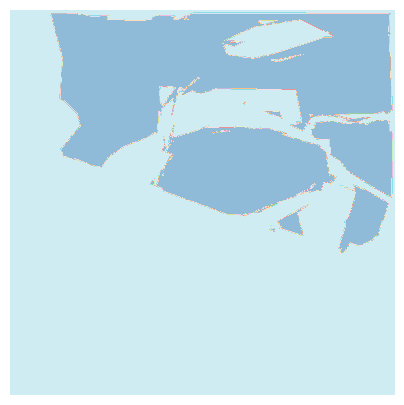

In [33]:
from pathlib import Path
from PIL import Image
from fastai.vision.core import PILMask # Import PILMask

# Assuming PILImage is a custom class or function,
# make sure it's properly defined and accessible in your environment

get_mask_path = lambda file: MASK_PATH_TRAIN / f"{file.stem}.png"

example_mask = PILMask.create(get_mask_path(IMAGES_PATH_TRAIN[2])) # Use PILMask.create to create a PILMask object

example_mask.show()

In [34]:
tensor(example_mask)

tensor([[255, 255, 255,  ..., 255, 255, 255],
        [255, 255, 255,  ..., 255, 255, 255],
        [255, 255, 255,  ..., 255, 255, 255],
        ...,
        [255, 255, 255,  ..., 255, 255, 255],
        [255, 255, 255,  ..., 255, 255, 255],
        [255, 255, 255,  ..., 255, 255, 255]], dtype=torch.uint8)

In [35]:
unique_codes = {0: 0, 1: 1, 2: 2, 3: 3, 4: 255}

In [36]:
from pathlib import Path
from PIL import Image
from fastai.vision.core import PILMask # Import PILMask
import numpy as np # Import numpy

def get_label(filename: Path, unique_codes: dict) -> PILMask:
    """
    Opens a mask image, converts it to a NumPy array,
    sets pixel values of 255 to 4, and creates a PILMask.

    Args:
      filename: Path to the mask image.
      unique_codes: Dictionary of unique codes (not used in this function).

    Returns:
      A PILMask object.
    """
    filename = get_mask_path(filename)
    mask_array = np.asarray(Image.open(filename)).copy() # Use Image.open instead of PIL.Image.open

    mask_array[mask_array == 255] = 4

    return PILMask.create(mask_array)

In [37]:
def get_label(filename: Path, unique_codes: dict) -> PILMask:
    filename = get_mask_path(filename)
    mask_array = np.asarray(PIL.Image.open(filename)).copy()

    mask_array[mask_array == 255] = 4

    return PILMask.create(mask_array)

In [39]:
from fastai.vision.core import tensor # Import tensor

tensor(get_label(IMAGES_PATH_TRAIN[2], unique_codes)) # Use IMAGES_PATH_TRAIN[2] to access the Path object directly

tensor([[4, 4, 4,  ..., 4, 4, 4],
        [4, 4, 4,  ..., 4, 4, 4],
        [4, 4, 4,  ..., 4, 4, 4],
        ...,
        [4, 4, 4,  ..., 4, 4, 4],
        [4, 4, 4,  ..., 4, 4, 4],
        [4, 4, 4,  ..., 4, 4, 4]], dtype=torch.uint8)

<Axes: >

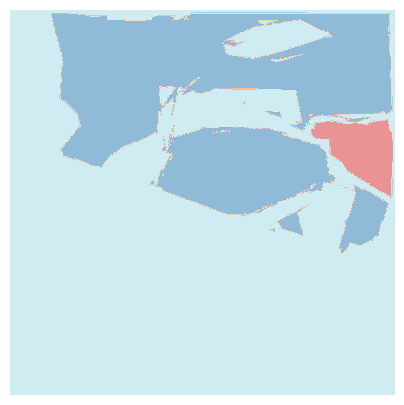

In [41]:
mask: PILMask = get_label(IMAGES_PATH_TRAIN[2], unique_codes) # Use IMAGES_PATH_TRAIN[2] to access the Path object directly
mask.show()

In [42]:
import numpy as np

codes = np.array(["soil", "bedrock", "sand", "big rock", "null"], dtype=str)

In [43]:
mask_sizes = mask.shape
mask_sizes

(1024, 1024)

In [44]:
mask_sizes = tuple(int(x / 4) for x in mask_sizes)
mask_sizes

(256, 256)

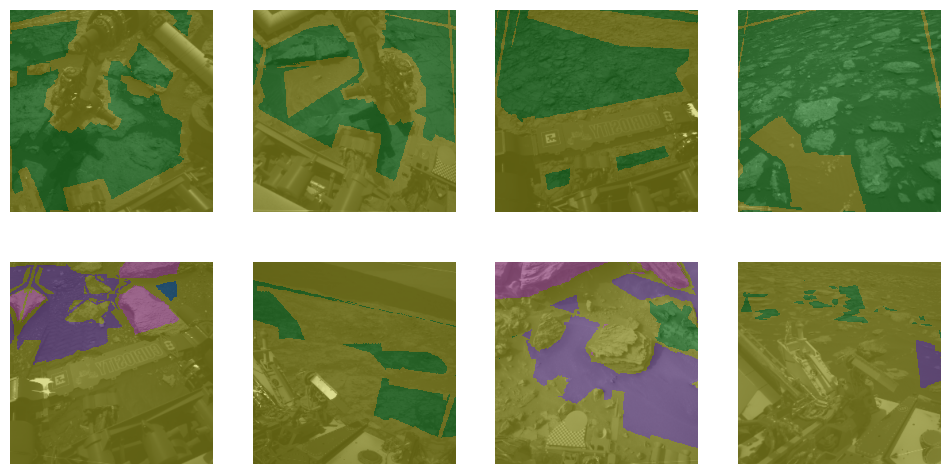

In [46]:
data_loader = DataBlock(
    blocks=(
        ImageBlock,
        MaskBlock(codes=codes),
    ),  # our input is an image and outpus is a mask
    splitter=RandomSplitter(),  # randomly split our dataset into 80% train and 20% valid
    get_y=partial(get_label, unique_codes=unique_codes),  # load our preprocessed labels
    batch_tfms=[
        *aug_transforms(size=mask_sizes),
        Normalize.from_stats(*imagenet_stats),
    ],  # apply some standard augs
).dataloaders(IMAGES_PATH_TRAIN, bs=8) # Pass the list of image files directly to dataloaders

data_loader.show_batch()

In [47]:
cleanup_gpu_cache()

learner = unet_learner(
    data_loader,
    resnet18,
    metrics=[partial(foreground_acc, bkg_idx=4), JaccardCoeffMulti()],
    loss_func=CrossEntropyLossFlat(axis=1),
    opt_func=Adam,
    norm_type=None,
    wd_bn_bias=True,
)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]


In [48]:
learner.summary()

DynamicUnet (Input shape: 8 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 64 x 128 x 128  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     8 x 64 x 64 x 64    
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [50]:
!pip install fastai
from fastai.callback.hook import num_params_in_model

def calc_model_size(model):
  "Calculate the number of parameters in `model` in millions."
  return num_params_in_model(model) / 1e6

assert calc_model_size(learner.model) <= 200.0

ImportError: cannot import name 'num_params_in_model' from 'fastai.callback.hook' (/usr/local/lib/python3.10/dist-packages/fastai/callback/hook.py)

In [51]:
from fastai.vision.all import *

def calc_model_size(model):
  "Calculate the size of the model in MB."
  param_size = 0
  for param in model.parameters():
    param_size += param.nelement() * param.element_size()
  return param_size / 1024**2

assert calc_model_size(learner.model) <= 200.0

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

'Learning Rate: 0.00010964782268274575'

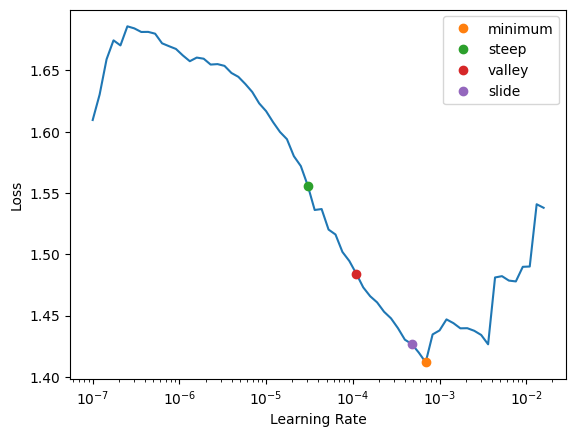

In [52]:
learning_rates = learner.lr_find(suggest_funcs=(minimum, steep, valley, slide))

learner.lr = learning_rates.valley

f"Learning Rate: {learner.lr}"

In [53]:
# Lets freeze the top layers so that we don't lose some of the pre-trained
# knowledge
learner.freeze()

In [54]:
# Set some callbacks for our model. One important callback is "early stopping"
# which is a simple regularization technique we can use to stop training when
# a specific metric, in this case the validation loss, stops improving.

# TODO: Have SaveModelCallback use safetensor instead of unsafe pickle format
callbacks: List[Callable] = [
    ShowGraphCallback(),
    EarlyStoppingCallback(),
    SaveModelCallback(fname="/workspace/models/ai4mars_model"),
]

if g_ENABLE_WANDB:
    callbacks.append(WandbCallback())

In [ ]:
cleanup_gpu_cache()

learner.fit_one_cycle(20, cbs=callbacks)

cleanup_gpu_cache()

epoch,train_loss,valid_loss,foreground_acc,jaccard_coeff_multi,time
